# Part 1 - Surgery Duration Prediction: Analysis
EDA, model metric comparisons, feature importance, and key feature-duration visualizations.
**Run `model_training.ipynb` first** to generate the `results/` folder.

## Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('surgeries to predict.csv')
print(f'Shape: {df.shape[0]} rows x {df.shape[1]} columns')


Shape: 10000 rows x 8 columns


## Preview the Data

In [2]:
df.head(10)

,Unnamed: 0,Surgery Type,Anesthesia Type,Age,BMI,DoctorID,AnaesthetistID,Duration in Minutes
0,0,3,1,44,20,853628,178042,149
1,1,0,0,56,27,369199,714022,86
2,2,0,1,45,22,519569,906701,81
3,3,1,0,63,22,230984,454178,177
4,4,1,0,40,35,706850,636647,127
5,5,4,1,55,19,835222,309624,176
6,6,0,0,45,24,602226,434653,75
7,7,4,1,49,30,789312,734567,166
8,8,4,0,59,24,908246,347532,151
9,9,0,1,34,26,754813,666622,71


## Column Data Types

In [3]:
df.dtypes

Unnamed: 0             int64
Surgery Type           int64
Anesthesia Type        int64
Age                    int64
BMI                    int64
DoctorID               int64
AnaesthetistID         int64
Duration in Minutes    int64
dtype: object

## Null Value Check

In [4]:
null_counts = df.isnull().sum()
null_pct    = (df.isnull().sum() / len(df) * 100).round(2)
null_summary = pd.DataFrame({'Null Count': null_counts, 'Null %': null_pct})
print(f'Total null cells: {df.isnull().sum().sum()}')
null_summary


Total null cells: 0


,Null Count,Null %
Unnamed: 0,0,0.0
Surgery Type,0,0.0
Anesthesia Type,0,0.0
Age,0,0.0
BMI,0,0.0
DoctorID,0,0.0
AnaesthetistID,0,0.0
Duration in Minutes,0,0.0


## Duplicate Rows Check

In [5]:
n_duplicates = df.duplicated().sum()
print(f'Duplicate rows: {n_duplicates}')


Duplicate rows: 0


## Basic Statistics

In [6]:
df.describe()

,Unnamed: 0,Surgery Type,Anesthesia Type,Age,BMI,DoctorID,AnaesthetistID,Duration in Minutes
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,4999.50000,1.995300,0.494200,49.585400,24.429700,555664.92060,547050.830900,115.154800
std,2886.89568,1.414383,0.499991,9.979723,5.049258,258429.07277,258173.206729,54.472795
min,0.00000,0.000000,0.000000,13.000000,4.000000,100097.00000,100058.000000,15.000000
25%,2499.75000,1.000000,0.000000,43.000000,21.000000,332224.25000,324239.250000,59.000000
50%,4999.50000,2.000000,0.000000,50.000000,24.000000,559765.00000,544535.000000,131.000000
75%,7499.25000,3.000000,1.000000,56.000000,28.000000,776335.50000,767940.250000,161.000000
max,9999.00000,4.000000,1.000000,88.000000,43.000000,999995.00000,999907.000000,242.000000


## Value Counts - Categorical Columns

In [7]:
print('=== Surgery Type ===')
print(df['Surgery Type'].value_counts().sort_index())
print()
print('=== Anesthesia Type ===')
print(df['Anesthesia Type'].value_counts().sort_index())


=== Surgery Type ===
0    1998
1    2041
2    1961
3    2010
4    1990
Name: Surgery Type, dtype: int64

=== Anesthesia Type ===
0    5058
1    4942
Name: Anesthesia Type, dtype: int64


Data looks preet balanced and evenly distributed across surgery type and anesthesia

## Sanity Checks: Negative or Zero Values

In [8]:
checks = {
    'Age <= 0':      (df['Age'] <= 0).sum(),
    'BMI <= 0':      (df['BMI'] <= 0).sum(),
    'Duration <= 0': (df['Duration in Minutes'] <= 0).sum(),
}
for check, count in checks.items():
    status = 'OK' if count == 0 else 'ISSUE FOUND'
    print(f'{check}: {count}  [{status}]')


Age <= 0: 0  [OK]
BMI <= 0: 0  [OK]
Duration <= 0: 0  [OK]


In [9]:
# map numeric type codes to readable labels for clearer visualizations later
surgery_map    = {0: 'C-section', 1: 'Appendectomy', 2: 'Hip Replacement',3: 'Knee Replacement', 4: 'Cataract'} 
anesthesia_map = {0: 'General', 1: 'Local'}
df['Surgery Name']    = df['Surgery Type'].map(surgery_map)
df['Anesthesia Name'] = df['Anesthesia Type'].map(anesthesia_map)
sns.set_theme(style='whitegrid', palette='muted')


## 1. Distribution of Surgery Duration

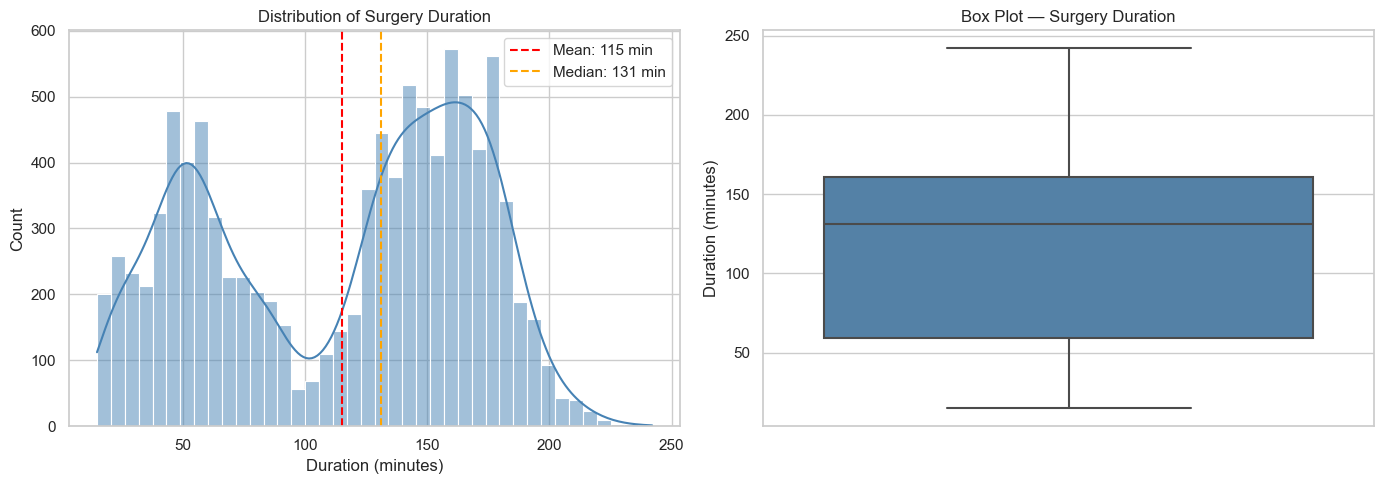

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['Duration in Minutes'], bins=40, kde=True, ax=axes[0], color='steelblue')
axes[0].axvline(df['Duration in Minutes'].mean(),   color='red',    linestyle='--', label=f"Mean: {df['Duration in Minutes'].mean():.0f} min")
axes[0].axvline(df['Duration in Minutes'].median(), color='orange', linestyle='--', label=f"Median: {df['Duration in Minutes'].median():.0f} min")
axes[0].set_title('Distribution of Surgery Duration')
axes[0].set_xlabel('Duration (minutes)')
axes[0].legend()
sns.boxplot(y=df['Duration in Minutes'], ax=axes[1], color='steelblue')
axes[1].set_title('Box Plot — Surgery Duration')
axes[1].set_ylabel('Duration (minutes)')
plt.tight_layout(); plt.show()


Durations are widely spread and appear bimodal, with a center around ~115–131 minutes and a long upper tail reaching roughly ~240 minutes

## 2. Distribution of Age and BMI

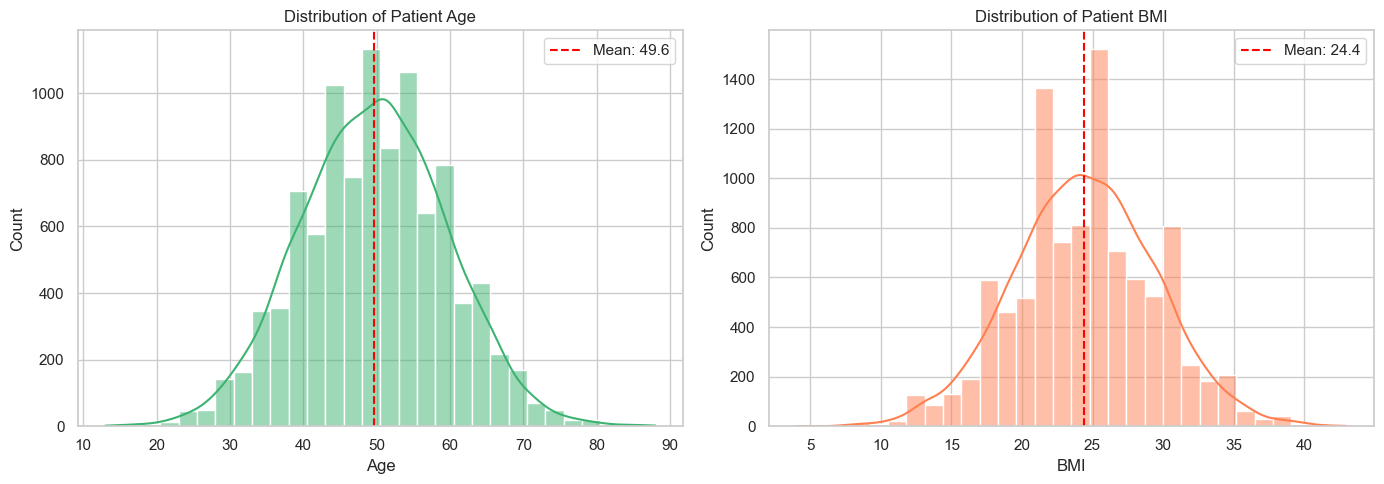

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['Age'], bins=30, kde=True, ax=axes[0], color='mediumseagreen')
axes[0].axvline(df['Age'].mean(), color='red', linestyle='--', label=f"Mean: {df['Age'].mean():.1f}")
axes[0].set_title('Distribution of Patient Age'); axes[0].legend()
sns.histplot(df['BMI'], bins=30, kde=True, ax=axes[1], color='coral')
axes[1].axvline(df['BMI'].mean(), color='red', linestyle='--', label=f"Mean: {df['BMI'].mean():.1f}")
axes[1].set_title('Distribution of Patient BMI'); axes[1].legend()
plt.tight_layout(); plt.show()


Patient age is roughly normally distributed around ~50, while BMI is centered around the mid-20s with a slight right tail toward higher values.

## 3. Duration by Surgery Type and Anesthesia Type

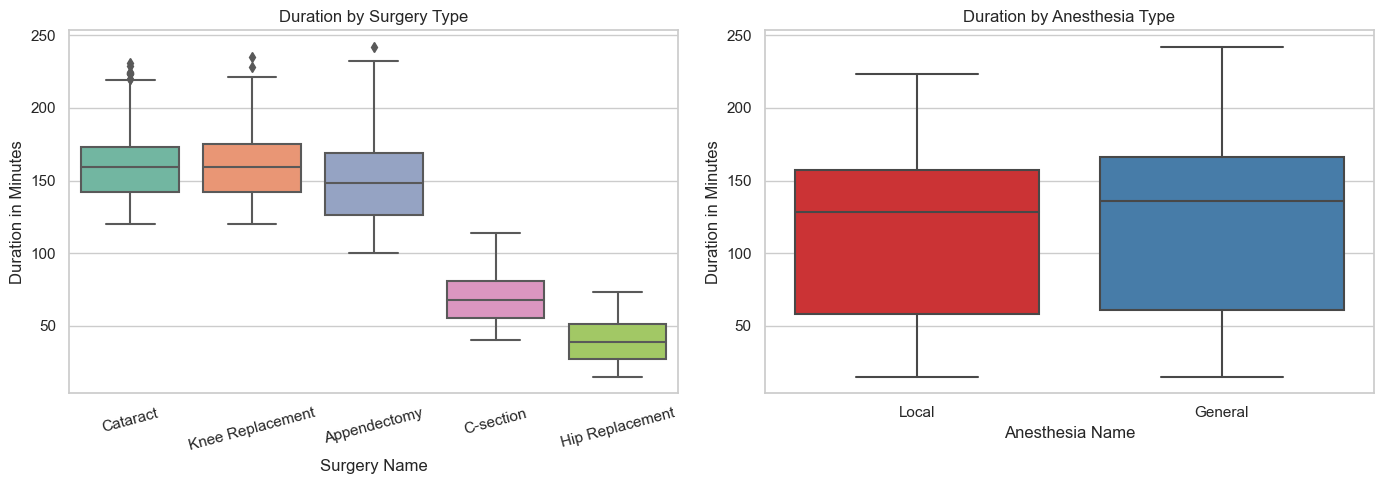

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
order = df.groupby('Surgery Name')['Duration in Minutes'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='Surgery Name', y='Duration in Minutes', order=order, ax=axes[0], palette='Set2')
axes[0].set_title('Duration by Surgery Type'); axes[0].tick_params(axis='x', rotation=15)
sns.boxplot(data=df, x='Anesthesia Name', y='Duration in Minutes', ax=axes[1], palette='Set1')
axes[1].set_title('Duration by Anesthesia Type')
plt.tight_layout(); plt.show()


- Procedure type is a strong driver of duration.
- General anesthesia shows a slightly higher median and wider spread than local, but the two distributions overlap heavily

## 4. Age and BMI vs Duration

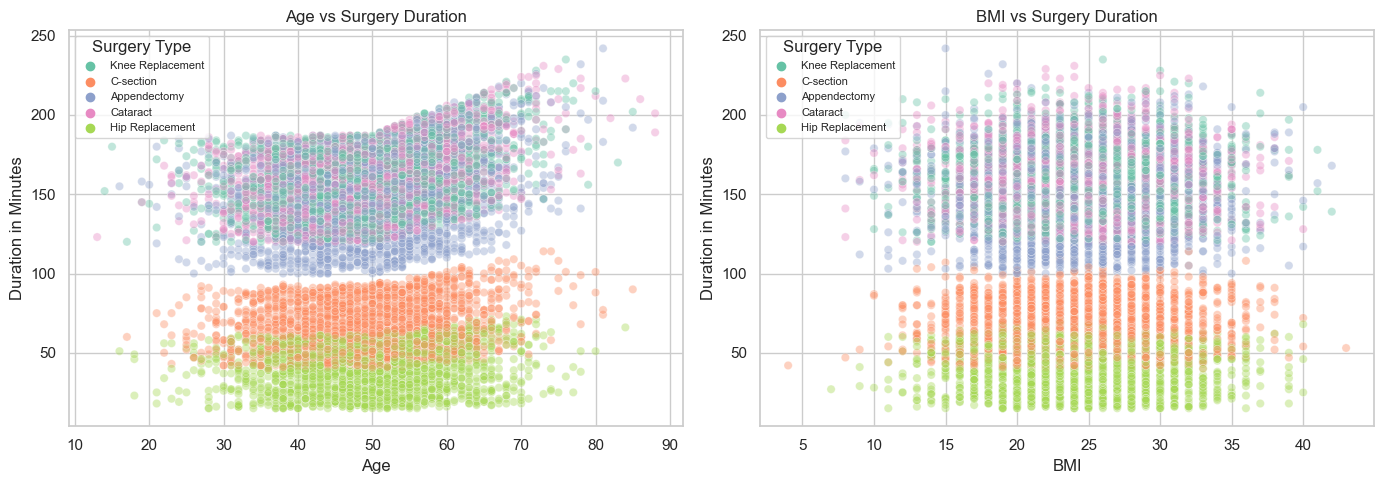

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.scatterplot(data=df, x='Age', y='Duration in Minutes', hue='Surgery Name', alpha=0.4, ax=axes[0], palette='Set2')
axes[0].set_title('Age vs Surgery Duration'); axes[0].legend(title='Surgery Type', fontsize=8)
sns.scatterplot(data=df, x='BMI', y='Duration in Minutes', hue='Surgery Name', alpha=0.4, ax=axes[1], palette='Set2')
axes[1].set_title('BMI vs Surgery Duration'); axes[1].legend(title='Surgery Type', fontsize=8)
plt.tight_layout(); plt.show()


Age shows a mild positive association with longer surgery durations (especially within some surgery types), while BMI shows little to no clear relationship with duration overall.

## 5. Correlation Heatmap

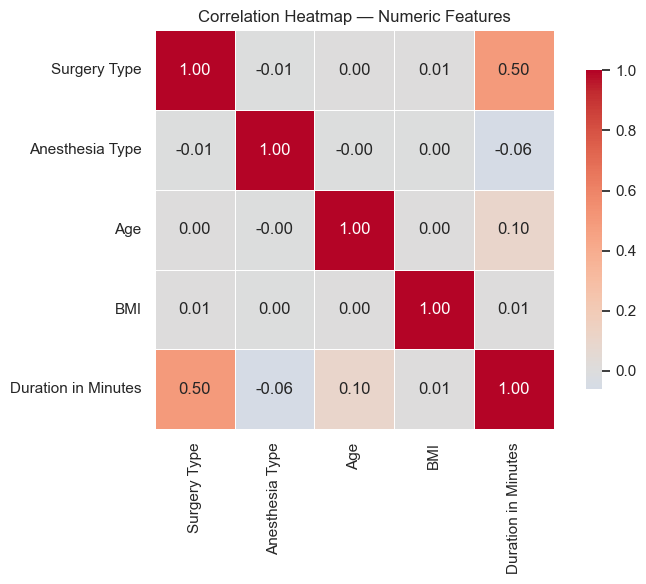

In [14]:
numeric_cols = ['Surgery Type', 'Anesthesia Type', 'Age', 'BMI', 'Duration in Minutes']
corr = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap — Numeric Features')
plt.tight_layout(); plt.show()


Surgery Type is by far the strongest correlate of duration (~0.50), while age is weak (~0.10) and BMI/anesthesia type are near zero, suggesting procedure type drives most of the variation in surgery length

---
## Model Training Results
Loads saved metrics from `results/` (generated by `model_training.ipynb`).

In [15]:
import json

results_df = pd.read_csv('results/default_results.csv', index_col=0)
tuned_df   = pd.read_csv('results/tuned_results.csv',   index_col=0)
log_df     = pd.read_csv('results/log_results.csv',     index_col=0)
feat_imp   = pd.read_csv('results/feature_importances.csv', index_col=0)['importance']

with open('results/best_model_info.json') as f:
    meta = json.load(f)

best_model_name = meta['best_model_name']
config_label    = meta['config_label']
best_acc        = meta['best_acc']
method          = meta['method']

print(f'Best model : {config_label}')
print(f'Acc ±15min : {best_acc:.2f}%')
print(f'MAE        : {(log_df if meta["use_log"] else tuned_df).loc[best_model_name, "MAE (min)"]} min')


Best model : XGBoost
Acc ±15min : 49.99%
MAE        : 15.74 min


### Model Comparison Tables

In [16]:
print('DEFAULT (5-fold CV)')
print(results_df[['MAE (min)', 'MAPE (%)', 'Acc ±15min (%)']].to_string())
print()
print('TUNED (5-fold CV)')
print(tuned_df[['MAE (min)', 'MAPE (%)', 'Acc ±15min (%)']].to_string())
print()
print('LOG TARGET (5-fold CV)')
print(log_df[['MAE (min)', 'MAPE (%)', 'Acc ±15min (%)']].to_string())


DEFAULT (5-fold CV)
                   MAE (min)  MAPE (%)  Acc ±15min (%)
Random Forest          17.39     20.68           49.25
Gradient Boosting      16.14     19.30           49.66
XGBoost                16.91     20.14           49.31
Ridge Regression       15.94     19.81           49.54

TUNED (5-fold CV)
                   MAE (min)  MAPE (%)  Acc ±15min (%)
Random Forest          15.85     18.96           49.48
Gradient Boosting      15.78     19.00           49.75
XGBoost                15.74     18.92           49.99
Ridge Regression       15.94     19.81           49.54

LOG TARGET (5-fold CV)
                   MAE (min)  MAPE (%)  Acc ±15min (%)
Random Forest          15.92     18.41           49.57
Gradient Boosting      15.87     18.43           49.66
XGBoost                15.82     18.34           49.86
Ridge Regression       16.04     19.05           49.92


### Default - Tuned - Log Target Comparison Chart

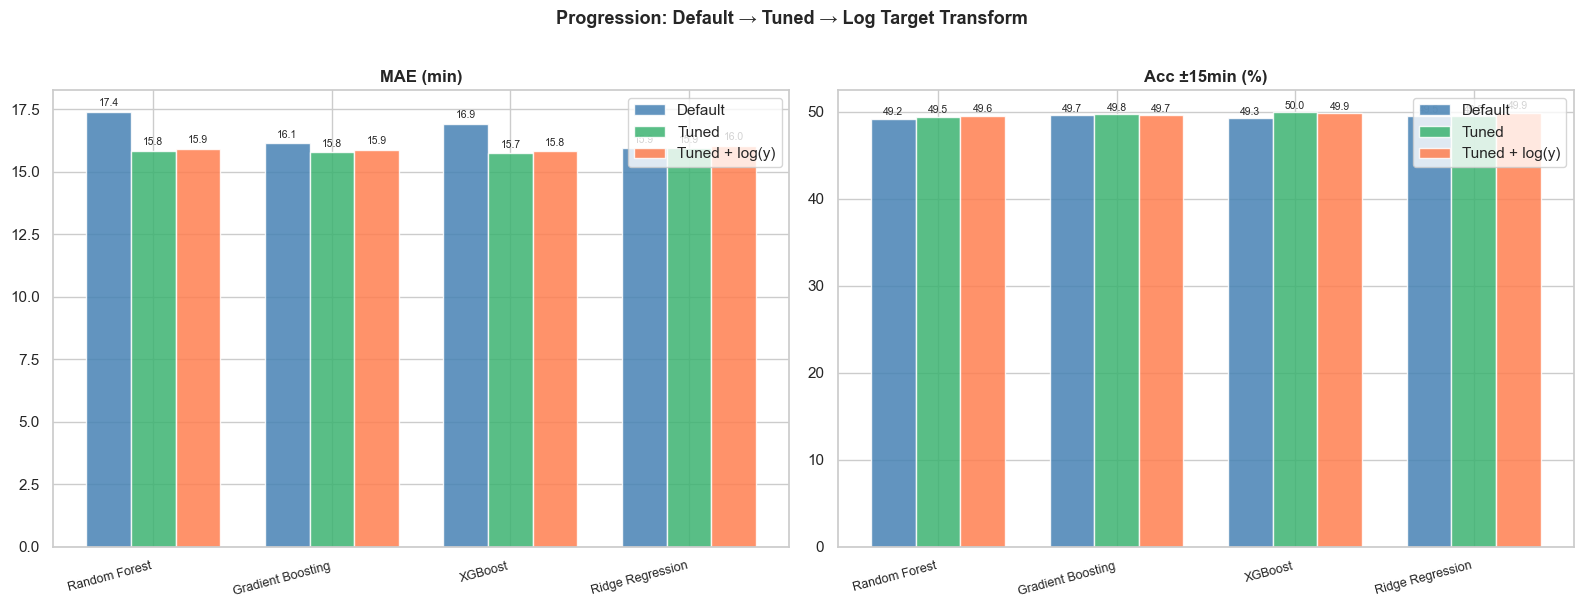

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
model_names = list(results_df.index)
x = np.arange(len(model_names))
w = 0.25
colors = ['steelblue', 'mediumseagreen', 'coral']
labels = ['Default', 'Tuned', 'Tuned + log(y)']

for ax, metric in zip(axes, ['MAE (min)', 'Acc ±15min (%)']):
    for i, (df_plot, label, color) in enumerate(zip([results_df, tuned_df, log_df], labels, colors)):
        vals = df_plot[metric].values
        bars = ax.bar(x + (i - 1) * w, vals, w, label=label, color=color, alpha=0.85)
        for bar, v in zip(bars, vals):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.15,
                    f'{v:.1f}', ha='center', va='bottom', fontsize=7.5)
    ax.set_title(metric, fontsize=12, fontweight='bold')
    ax.set_xticks(x); ax.set_xticklabels(model_names, rotation=15, ha='right', fontsize=9)
    ax.legend()

plt.suptitle('Progression: Default, Tuned, Log Target Transform',
             fontsize=13, fontweight='bold', y=1.01)
plt.tight_layout(); plt.show()


### Feature Importance - Top 5 & Top 20

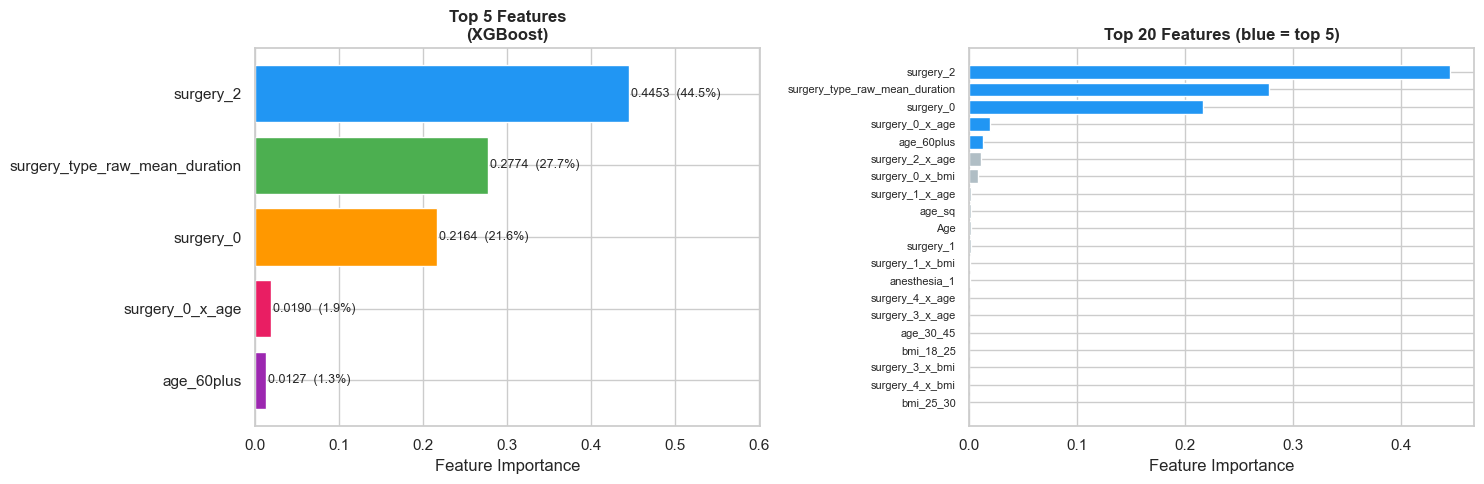

Importance method: built-in
Top 5 account for 97.1% of total importance


In [18]:
top5      = feat_imp.head(5)
total_imp = feat_imp.sum()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

colors_top5 = ['#2196F3', '#4CAF50', '#FF9800', '#E91E63', '#9C27B0']
bars = axes[0].barh(top5.index[::-1], top5.values[::-1], color=colors_top5[::-1])
axes[0].set_xlabel('Feature Importance')
axes[0].set_title(f'Top 5 Features\n({config_label})', fontweight='bold')
for bar, val in zip(bars, top5.values[::-1]):
    axes[0].text(bar.get_width() + total_imp * 0.002, bar.get_y() + bar.get_height()/2,
                 f'{val:.4f}  ({val/total_imp*100:.1f}%)', va='center', fontsize=9)
axes[0].set_xlim(0, top5.max() * 1.35)

top20   = feat_imp.head(20)
palette = ['#2196F3' if i < 5 else '#B0BEC5' for i in range(len(top20))]
axes[1].barh(top20.index[::-1], top20.values[::-1], color=palette[::-1])
axes[1].set_xlabel('Feature Importance')
axes[1].set_title('Top 20 Features (blue = top 5)', fontweight='bold')
axes[1].tick_params(axis='y', labelsize=8)

plt.tight_layout(); plt.show()
print(f'Importance method: {method}')
print(f'Top 5 account for {top5.sum()/total_imp*100:.1f}% of total importance')


---
## Key Feature - Duration Relationships

### Viz 1 - Duration by Surgery Type

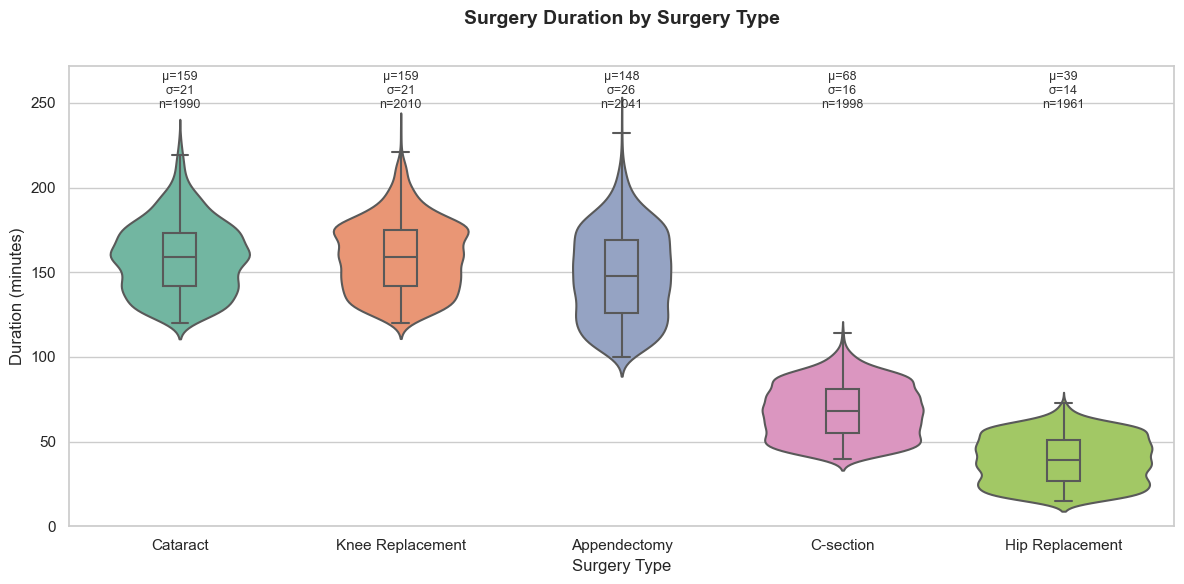

In [19]:
plot_df = df.copy()
order = plot_df.groupby('Surgery Name')['Duration in Minutes'].median().sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(data=plot_df, x='Surgery Name', y='Duration in Minutes',
               order=order, palette='Set2', inner=None, ax=ax, alpha=0.6)
sns.boxplot(data=plot_df, x='Surgery Name', y='Duration in Minutes',
            order=order, width=0.15, boxprops=dict(zorder=2),
            palette='Set2', ax=ax, showfliers=False)

stats = plot_df.groupby('Surgery Name')['Duration in Minutes'].agg(['mean', 'std', 'count'])
for i, surgery in enumerate(order):
    mean, std, n = stats.loc[surgery, 'mean'], stats.loc[surgery, 'std'], stats.loc[surgery, 'count']
    ax.text(i, plot_df['Duration in Minutes'].max() + 5,
            f'μ={mean:.0f}\nσ={std:.0f}\nn={n}', ha='center', fontsize=9, color='#333333')

ax.set_title('Surgery Duration by Surgery Type', fontsize=14, fontweight='bold', pad=30)
ax.set_xlabel('Surgery Type'); ax.set_ylabel('Duration (minutes)')
ax.set_ylim(0, plot_df['Duration in Minutes'].max() + 30)
plt.tight_layout(); plt.show()


### Viz 2 - Mean Duration by Age Group × Surgery Type

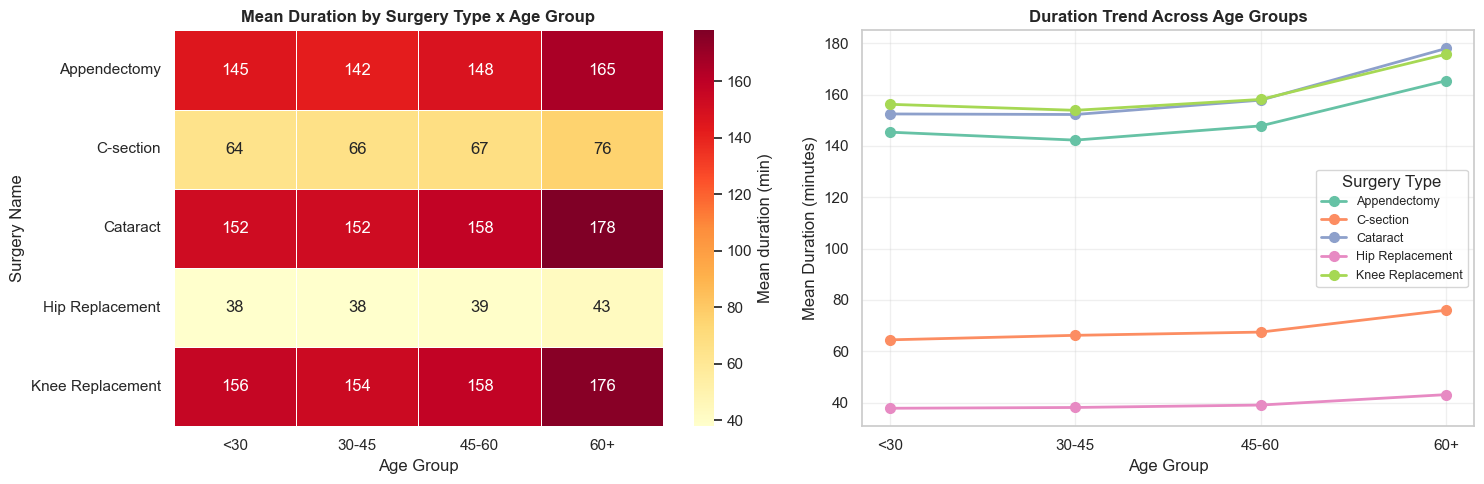

In [20]:
age_bins   = [0, 30, 45, 60, np.inf]
age_labels = ['<30', '30-45', '45-60', '60+']
plot_df['Age Group'] = pd.cut(plot_df['Age'], bins=age_bins, labels=age_labels)

pivot = plot_df.pivot_table(values='Duration in Minutes',
                             index='Surgery Name', columns='Age Group',
                             aggfunc='mean')[age_labels]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlOrRd', linewidths=0.5, ax=axes[0],
            cbar_kws={'label': 'Mean duration (min)'})
axes[0].set_title('Mean Duration by Surgery Type x Age Group', fontweight='bold')

colors = sns.color_palette('Set2', len(pivot))
for i, (surgery, row) in enumerate(pivot.iterrows()):
    axes[1].plot(age_labels, row.values, marker='o', label=surgery,
                 color=colors[i], linewidth=2, markersize=7)
axes[1].set_title('Duration Trend Across Age Groups', fontweight='bold')
axes[1].set_xlabel('Age Group'); axes[1].set_ylabel('Mean Duration (minutes)')
axes[1].legend(title='Surgery Type', fontsize=9); axes[1].grid(True, alpha=0.3)
plt.tight_layout(); plt.show()


### Viz 3 - Duration by Anesthesia Type within each Surgery Type

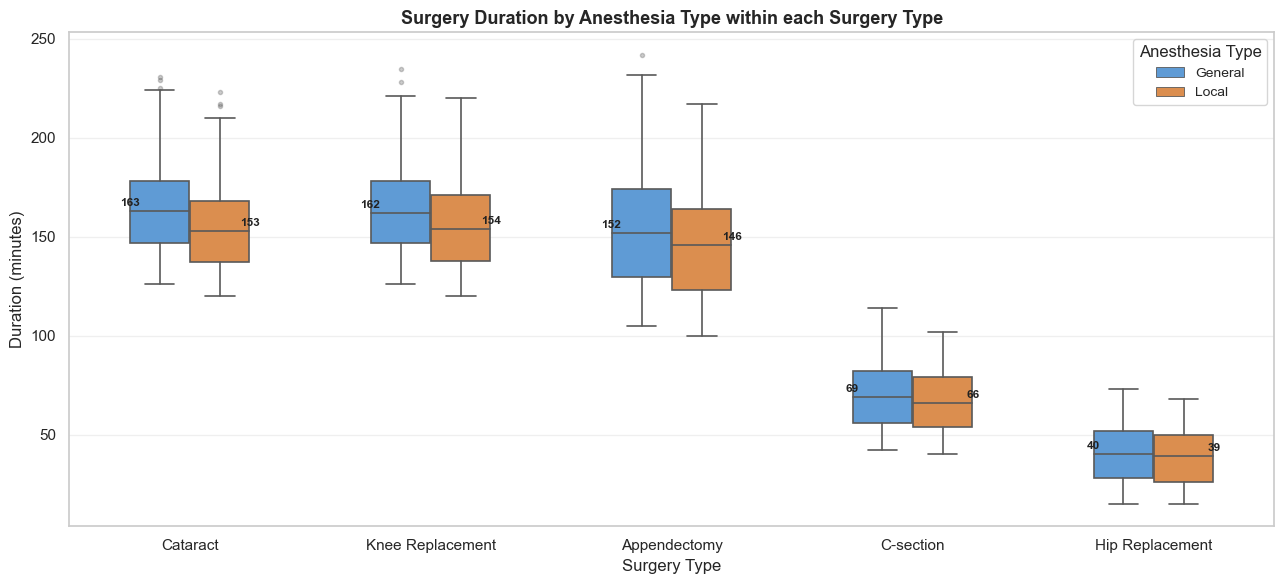

In [21]:
fig, ax = plt.subplots(figsize=(13, 6))
sns.boxplot(data=plot_df, x='Surgery Name', y='Duration in Minutes',
            hue='Anesthesia Name', order=order, hue_order=['General', 'Local'],
            palette={'General': '#4C9BE8', 'Local': '#F28C38'},
            width=0.5, linewidth=1.2,
            flierprops=dict(marker='o', markersize=3, alpha=0.3), ax=ax)

for i, surgery in enumerate(order):
    for j, anesthesia in enumerate(['General', 'Local']):
        subset = plot_df[
            (plot_df['Surgery Name'] == surgery) &
            (plot_df['Anesthesia Name'] == anesthesia)
        ]['Duration in Minutes']
        median = subset.median()
        x_pos  = i + (j - 0.5) * 0.5
        ax.text(x_pos, median + 1.5, f'{median:.0f}',
                ha='center', va='bottom', fontsize=8.5, fontweight='bold', color='#222222')

ax.set_title('Surgery Duration by Anesthesia Type within each Surgery Type',
             fontsize=13, fontweight='bold')
ax.set_xlabel('Surgery Type'); ax.set_ylabel('Duration (minutes)')
ax.legend(title='Anesthesia Type', fontsize=10)
ax.grid(True, axis='y', alpha=0.3)
plt.tight_layout(); plt.show()
